### Setup

In [1]:
from os.path import join

from pathlib import Path
cwd = Path.cwd()

### Day 1

In [3]:
from operator import sub, abs

list1 = []
list2 = []

with open(join(cwd, "inputs/input_1.txt")) as file:
    for line in file:
        line = line.strip().split("   ")
        list1.append(int(line[0]))
        list2.append(int(line[1]))

list1.sort()
list2.sort()

dif = [*map(sub, list2, list1)]
dif = [*map(abs, dif)]


result = sum(dif)

print(result)

1722302


In [4]:
sim_score = 0

for elemL in list1:
    count = 0
    for elemR in list2:
        if elemL == elemR:
            count += 1
    sim_score += elemL * count

print(sim_score)

20373490


### Day 2

In [5]:
safe_count = 0

with open(join(cwd, "inputs/input_2.txt")) as file:
    for line in file:
        report = line.strip().split(" ")
        report = [int(x) for x in report]
        
        iter = [*zip(report, report[1:])]
        if (all(a<b for a,b in iter) or all(a>b for a,b in iter)) and all(abs(a-b)<=3 for a,b in iter):
            safe_count += 1
        
print(safe_count)

411


In [6]:
safe_count = 0

with open(join(cwd, "inputs/input_2.txt")) as file:
    for line in file:
        report = line.strip().split(" ")
        report = [int(x) for x in report]
        
        safe = 0
        for i in range(len(report)):
            report_one_less = [x[1] for x in enumerate(report) if x[0] != i]
            iter = [*zip(report_one_less, report_one_less[1:])]
            if (all(a<b for a,b in iter) or all(a>b for a,b in iter)) and all(abs(a-b)<=3 for a,b in iter):
                safe += 1

        if safe >= 1:
            safe_count += 1

print(safe_count)

465


### Day 3 ###

In [7]:
import re

mul_sum = 0
global_matches = []

with open(join(cwd, "inputs/input_3.txt")) as file:
    for line in file:
        matches = re.findall(r'mul\(\d+,\d+\)', line)
        global_matches += matches

for match in global_matches:
    operands = match.split('(')[1].split(')')[0].split(',')
    mul_sum += int(operands[0]) * int(operands[1])

print(mul_sum)

179834255


In [8]:
import re

mul_sum = 0
global_matches = []
toggle_on = True

with open(join(cwd, "inputs/input_3.txt")) as file:
    for line in file:
        toggle_on_pat = re.compile(r'do\(\)')
        toggle_off_pat = re.compile(r'don\'t\(\)')
        mul_pat = re.compile(r'mul\(\d+,\d+\)')
        
        for i in range(len(line)):
            for j in range(i + 1, len(line) + 1):
                window = line[i:j]
                if toggle_on_pat.fullmatch(window):
                    toggle_on = True
                elif toggle_off_pat.fullmatch(window):
                    toggle_on = False
                if toggle_on and mul_pat.fullmatch(window):
                    global_matches.append(window)

for match in global_matches:
    operands = match.split('(')[1].split(')')[0].split(',')
    mul_sum += int(operands[0]) * int(operands[1])

print(mul_sum)

80570939


### Day 4

In [9]:
word_search = []
xmas_counter = 0

with open(join(cwd, "inputs/input_4.txt")) as file:
    for line in file:
        line = line.strip()
        word_search.append(line)

length = len(word_search)
for i in range(length):
    for j in range(length):
        if word_search[i][j] == 'X':
            #straight
            if j < length - 3:
                if word_search[i][j+1] == 'M'and word_search[i][j+2] == 'A' and word_search[i][j+3] == 'S': xmas_counter+=1
            if j > 2:    
                if word_search[i][j-1] == 'M' and word_search[i][j-2] == 'A' and word_search[i][j-3] == 'S': xmas_counter+=1
            if i < length - 3:    
                if word_search[i+1][j] == 'M' and word_search[i+2][j] == 'A' and word_search[i+3][j] == 'S': xmas_counter+=1
            if i > 2:      
                if word_search[i-1][j] == 'M' and word_search[i-2][j] == 'A' and word_search[i-3][j] == 'S': xmas_counter+=1 

            #diagonal
            if i < length - 3 and j < length - 3:
                if word_search[i+1][j+1] == 'M' and word_search[i+2][j+2] == 'A' and word_search[i+3][j+3] == 'S': xmas_counter+=1
            if i < length - 3 and j > 2:
                if word_search[i+1][j-1] == 'M' and word_search[i+2][j-2] == 'A' and word_search[i+3][j-3] == 'S': xmas_counter+=1
            if i > 2 and j < length - 3:    
                if word_search[i-1][j+1] == 'M' and word_search[i-2][j+2] == 'A' and word_search[i-3][j+3] == 'S': xmas_counter+=1
            if i > 2 and j > 2:    
                if word_search[i-1][j-1] == 'M' and word_search[i-2][j-2] == 'A' and word_search[i-3][j-3] == 'S': xmas_counter+=1

print(xmas_counter)

2644


In [10]:
x_mas_counter = 0

for i in range(len(word_search)):
    for j in range(len(word_search[0])):
        if(i != 0 and i != len(word_search)-1 and j != 0 and j != len(word_search)-1):
            if word_search[i][j] == "A":
                if word_search[i+1][j+1] == "M" and word_search[i+1][j-1] == "M" and word_search[i-1][j+1] == "S" and word_search[i-1][j-1] == "S": x_mas_counter+=1
                if word_search[i+1][j+1] == "M" and word_search[i+1][j-1] == "S" and word_search[i-1][j+1] == "M" and word_search[i-1][j-1] == "S": x_mas_counter+=1
                if word_search[i+1][j+1] == "S" and word_search[i+1][j-1] == "M" and word_search[i-1][j+1] == "S" and word_search[i-1][j-1] == "M": x_mas_counter+=1
                if word_search[i+1][j+1] == "S" and word_search[i+1][j-1] == "S" and word_search[i-1][j+1] == "M" and word_search[i-1][j-1] == "M": x_mas_counter+=1

print(x_mas_counter)

1952


### Day 5

In [11]:
rules = []
updates = []

with open(join(cwd, "inputs/input_5.txt")) as file:
    rules_updates = file.read().split("\n\n")
    for line in rules_updates[0].split("\n"):
        line = line.strip().split("|")
        rules.append((int(line[0]), int(line[1])))
    for line in rules_updates[1].split("\n"):
        line = line.strip().split(",")
        updates.append(list([int(x) for x in line]))
    

result = 0

# Used for part 2
false_updates = []

for update in updates:
    valid = True
    
    for rule in rules:
        if rule[0] in update and rule[1] in update and update.index(rule[0]) > update.index(rule[1]): 
            valid = False
            false_updates.append(update)
            break

    if valid:
        result += update[int((len(update)-1)/2)]

print(result)

6498


In [12]:
result = 0

for update in false_updates:
    valid = False
    while(not valid):
        valid = True
        for i in range(len(update)):
            for j in range(i+1, len(update)):
                if i == len(update):
                    break
                else:
                    if (update[j], update[i]) in rules:
                        update[i], update[j] = update[j], update[i]
                        valid = False
                        break 
            
    result += update[int((len(update)-1)/2)]

print(result)

5017


### Day 6

In [13]:
grid = []

with open(join(cwd, "inputs/input_6.txt")) as file:
    for line in file:
        grid.append(list(line.strip()))

def getNewDirection(direction):
    if direction == (0,-1):
        return (1,0)
    if direction == (1,0):
        return (0, 1)
    if direction == (0,1):
        return (-1,0)
    if direction == (-1,0):
        return (0,-1)
    
    

dir = (0,-1)
pos_y = grid.index([x for x in grid if "^" in x][0])
pos_x = grid[pos_y].index("^")

visited = set([(pos_x, pos_y)])

while(True):
    # Guard exits the grid
    if(pos_y+dir[1] < 0 or pos_y+dir[1] >= len(grid) or pos_x+dir[0] < 0 or pos_x+dir[0] >= len(grid[0])):
        break
    
    # Guard hits a barrel
    if(grid[pos_y+dir[1]][pos_x+dir[0]] == "#"):
        dir = getNewDirection(dir)
        continue
    
    # Guard moves
    pos_x += dir[0]
    pos_y += dir[1]
    visited.add((pos_x, pos_y))

print(len(visited))

5305


In [14]:
loops = 0

for point in list(visited)[1:]:
    grid[point[1]][point[0]] = "#"
    dir = (0,-1)
    pos_y = 49
    pos_x = 39

    visit = set()

    while(True):
        # Guard exits the grid
        if(pos_y+dir[1] < 0 or pos_y+dir[1] >= len(grid) or pos_x+dir[0] < 0 or pos_x+dir[0] >= len(grid[0])):
            break
                
        # Guard hits a barrel
        if(grid[pos_y+dir[1]][pos_x+dir[0]] == "#"):
            dir = getNewDirection(dir)
            continue
                
        # Guard moves
        pos_x += dir[0]
        pos_y += dir[1]
        if((pos_x, pos_y, dir) in visit):
            loops += 1
            break
        visit.add((pos_x, pos_y, dir))

    grid[point[1]][point[0]] = "."


print(loops)

2142


### Day 7

In [15]:
from itertools import product

test_values = []
numbers = []

with open(join(cwd, "inputs/input_7.txt")) as file:
    for line in file:
        t = line.strip().split(":")
        test_values.append(int(t[0]))
        numbers.append([int(x) for x in t[1].strip().split(" ")])

result = 0
operators = ['+', '*']

for i in range(len(numbers)):
    for ops in product(operators, repeat=len(numbers[i]) - 1):
        value = numbers[i][0]
        for index, op in enumerate(ops):
            if op == '+':
                value += numbers[i][index+1]
            elif op == '*':
                value *= numbers[i][index+1]
        if(value == test_values[i]):
            result += value
            break 

print(result)

4122618559853


In [16]:
result = 0
operators = ['+', '*', '||']

for i in range(len(numbers)):
    for ops in product(operators, repeat=len(numbers[i]) - 1):
        value = numbers[i][0]
        for index, op in enumerate(ops):
            if op == '+':
                value += numbers[i][index+1]
            elif op == '*':
                value *= numbers[i][index+1]
            elif op == '||':
                value = int(str(value) + str(numbers[i][index+1]))
        if(value == test_values[i]):
            result += value
            break 

print(result)

227615740238334


### Day 8

In [17]:
import re
import itertools

grid = []

with open(join(cwd, "inputs/input_8.txt")) as file:
    for line in file:
        grid.append(list(line.strip()))

# Make a dictionary nodeName:[list of positions on the grid]
node_pos_dict = {}
node_pat = re.compile(r'[0-9a-zA-Z]')

for y in range(len(grid)):
    for x in range(len(grid[0])):
        node = grid[y][x]
        if node_pat.fullmatch(node):
            if node in node_pos_dict.keys():
                node_pos_dict[node] += [(x,y)]
            else:
                node_pos_dict[node] = [(x,y)] 

antinodes = set()

def inbounds(node):
    if node[0] < 0 or node[1] < 0 or node[0] >= len(grid[0]) or node[1] >= len(grid):
        return False
    else:
        return True

for node_type in node_pos_dict:
    for node_combo in itertools.combinations(node_pos_dict[node_type], 2):
        
        antinode1 = (2*node_combo[0][0] - node_combo[1][0], 2*node_combo[0][1] - node_combo[1][1]) 
        antinode2 = (2*node_combo[1][0] - node_combo[0][0], 2*node_combo[1][1] - node_combo[0][1])

        if inbounds(antinode1):
            antinodes.add(antinode1)
        if inbounds(antinode2):
            antinodes.add(antinode2)


print(len(antinodes))

305


In [18]:
antinodes = set()

for node_type in node_pos_dict:
    for node_combo in itertools.combinations(node_pos_dict[node_type], 2):
        
        antenna1 = node_combo[0]
        antenna2 = node_combo[1]
        
        dx1, dy1 = node_combo[0][0] - node_combo[1][0], node_combo[0][1] - node_combo[1][1]
        dx2, dy2 = node_combo[1][0] - node_combo[0][0], node_combo[1][1] - node_combo[0][1]
        
        while(inbounds(antenna1)):
            antinodes.add(antenna1)
            antenna1 = (antenna1[0] + dx1, antenna1[1] + dy1)
            
        while(inbounds(antenna2)):
            antinodes.add(antenna2)
            antenna2 = (antenna2[0] + dx2, antenna2[1] + dy2)
        
print(len(antinodes))
        

1150


### Day 9

In [19]:
data = 0

with open(join(cwd, "inputs/input_9.txt")) as file:
    data = file.readline().strip()

disk = []
file_Id = 0
for i in range(len(data)):
    if i%2 == 0:
        for block in range(int(data[i])):
            disk.append(file_Id)
        file_Id += 1
    else:
        for block in range(int(data[i])):
            disk.append(".")

left = 0
right = len(disk) - 1
while (left != right):
    if(disk[left] != "."):
        left +=1
        continue
    if(disk[right] == "."):
        right -= 1
        continue
    
    disk[left], disk[right] = disk[right], disk[left]

checksum = 0
for i in range(len(disk)):
    if disk[i] == ".":
        break
    checksum += disk[i]*i

print(checksum)

6279058075753


In [20]:
# [(fileId, start, length)]
files = []
# [(start, length)]
spaces = []

file_Id = 0
block_start = 0

for i in range(len(data)):
    block_len = int(data[i])
    if i%2 == 0:
        files.append((file_Id, block_start, block_len))
        file_Id += 1
        block_start += block_len
    else:
        spaces.append((block_start, block_len))
        block_start += block_len

checksum = 0
files.reverse()
for f in range(len(files)):
    for s in range(len(spaces)):
        if files[f][2] <= spaces[s][1] and spaces[s][0] < files[f][1]:
            files[f] = (files[f][0], spaces[s][0], files[f][2])
            spaces[s] = (spaces[s][0] + files[f][2], spaces[s][1] - files[f][2])
            break
    for i in range(files[f][2]):
        checksum += files[f][0] * (files[f][1] + i)        
print(checksum)
    

6301361958738


### Day 10

In [21]:
topmap = []

with open(join(cwd, "inputs/input_10.txt")) as file:
    for line in file:
        topmap.append([int(x) for x in list(line.strip())])

def count_nines(start):
    nines = set()
    def traverse(x, y, current_value):
        if x < 0 or y < 0 or x >= len(topmap[0]) or y >= len(topmap):
            return
        if topmap[y][x] != current_value:
            return
        if current_value == 9:
            nines.add((x,y))
            return
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            traverse(x + dx, y + dy, current_value + 1)
    
    start_x, start_y = start
    traverse(start_x, start_y, 0)
    return len(nines)

result = 0
for y in range(len(topmap)):
    for x in range(len(topmap[0])):
        if topmap[y][x] == 0:
           result += count_nines((x, y))
print(result) 

472


In [22]:
def find_paths(start):
    paths = []
    def traverse(x, y, current_path, current_value):
        if x < 0 or y < 0 or x >= len(topmap[0]) or y >= len(topmap):
            return
        if (x, y) in current_path:
            return
        if topmap[y][x] != current_value:
            return
        current_path.append((x, y))
        if current_value == 9:
            paths.append(list(current_path))
            current_path.pop()
            return
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            traverse(x + dx, y + dy, current_path, current_value + 1)
        current_path.pop()
    
    start_x, start_y = start
    traverse(start_x, start_y, [], 0)
    return paths

result = 0
for y in range(len(topmap)):
    for x in range(len(topmap[0])):
        if topmap[y][x] == 0:
           result += len(find_paths((x, y)))
print(result) 

969


### Day 11

In [23]:
stones = []
with open(join(cwd, "inputs/input_11.txt")) as file:
    stones = [int(x) for x in file.readline().strip().split(" ")]

def blink(stones):
    new_stones = []
    for stone in stones:  
        if stone == 0:
            new_stones.append(1)
        elif len(str(stone)) % 2 == 0:   
            mid = int(len(str(stone))/2)
            left = str(stone)[:mid]
            right = str(stone)[mid:]
            new_stones.append(int(left))
            new_stones.append(int(right))
        else:
            new_stones.append(stone*2024)
    return(new_stones)

N = 25        
for i in range(N):
    stones = blink(stones)

print(len(stones))

194557


In [24]:
from collections import Counter

stones = []
with open(join(cwd, "inputs/input_11.txt")) as file:
    stones = [int(x) for x in file.readline().strip().split(" ")]

def blink(stones):
    new_stones = Counter()
    for stone in stones:
        if stone == 0:
            new_stones[1] += stones[0]
        elif len(str(stone)) % 2 == 0:   
            mid = int(len(str(stone))/2)
            left = str(stone)[:mid]
            right = str(stone)[mid:]
            new_stones[int(left)] += stones[stone]
            new_stones[int(right)] += stones[stone]
        else:
            new_stones[stone*2024] += stones[stone]
    return(new_stones)

N = 75 
stones = Counter(stones)    
for i in range(N):
    stones = blink(stones)

print(stones.total())


231532558973909


### Day 12

In [25]:
from collections import deque
garden = []

with open(join(cwd, "inputs/input_12.txt")) as file:
    for line in file:
        garden.append(list(line.strip()))

def find_clusters(grid):
    rows, cols = len(grid), len(grid[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    def bfs(start_row, start_col):
        letter = grid[start_row][start_col]
        cluster = []
        queue = deque([(start_row, start_col)])
        visited[start_row][start_col] = True
        while queue:
            r, c = queue.popleft()
            cluster.append((r, c))
            for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nr, nc = r + dr, c + dc
                if 0 <= nr < rows and 0 <= nc < cols and not visited[nr][nc] and grid[nr][nc] == letter:
                    visited[nr][nc] = True
                    queue.append((nr, nc))
        return cluster

    clusters = []
    for row in range(rows):
        for col in range(cols):
            if not visited[row][col]:
                cluster = bfs(row, col)
                clusters.append(cluster)
    return clusters

def get_perimeter(grid, cluster):
    rows, cols = len(grid), len(grid[0])
    perimeter = 0
    for r, c in cluster:
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nr, nc = r + dr, c + dc
            if not (0 <= nr < rows and 0 <= nc < cols) or grid[nr][nc] != grid[r][c]:
                perimeter += 1
    return perimeter

result = 0
clusters = find_clusters(garden)
for cluster in clusters:
    perimeter = get_perimeter(garden, cluster)
    area = len(cluster)
    result += perimeter * area

print(result)

1550156


In [26]:
def count_corners(grid, cluster):
    rows, cols = len(grid), len(grid[0])
    corners = 0
    for r, c in cluster:
        outside_neighbours = []
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nr, nc = r + dr, c + dc
            if not (0 <= nr < rows and 0 <= nc < cols) or grid[nr][nc] != grid[r][c]:
                outside_neighbours.append((dr, dc))
        # Single square
        if(len(outside_neighbours) == 4):
            corners += 4
        # Corner type: |_| 
        if(len(outside_neighbours) == 3):
            corners += 2
        # Corner type: outside |_ make sure its not | |
        if(len(outside_neighbours) == 2):
            r1, c1 = outside_neighbours[0]
            r2, c2 = outside_neighbours[1]
            if(r1 + r2 != 0 and c1 + c2 != 0):
                corners += 1
        # Corner type: inside |_
        for dr, dc in [(1, 1), (1, -1), (-1, 1), (-1, -1)]:
            if (r+dr, c) in cluster and (r, c+dc) in cluster and not (r+dr, c+dc) in cluster:
                corners += 1
    return corners

result = 0
for cluster in clusters:
    # number of corners and number of sides are always the same
    sides = count_corners(garden, cluster)
    area = len(cluster)
    result += sides * area

print(result)

946084


### Day 13

In [27]:
machines = []
with open(join(cwd, "inputs/input_13.txt")) as file:
    blocks = file.read().split("\n\n")
    for block in blocks:
        block= block.split("\n")
        
        button_a = (int(block[0].split(",")[0].split("+")[1]), int(block[0].split(",")[1].split("+")[1]))
        button_b = (int(block[1].split(",")[0].split("+")[1]), int(block[1].split(",")[1].split("+")[1]))
        prize = (int(block[2].split(",")[0].split("=")[1]), int(block[2].split(",")[1].split("=")[1]))
        
        machines.append([button_a, button_b, prize])
        
solutions = []
for machine in machines:
    x1, y1 = machine[0]
    x2, y2 = machine[1]
    x_fin, y_fin = machine[2]

    for a in range(101):
        for b in range(101):
            if x1 * a + x2 * b == x_fin and y1 * a + y2 * b == y_fin:
                solutions.append((a,b))
                break
        else:
            continue
        break

tokens = 0
for solution in solutions:
    tokens += 3 * solution[0]
    tokens += solution[1]

print(tokens)

33481


In [28]:
from sympy import symbols, Eq, solve
solutions = []

for machine in machines:
    x1, y1 = machine[0]
    x2, y2 = machine[1]
    x_fin, y_fin = machine[2]
    x_fin += 10000000000000
    y_fin += 10000000000000

    # Define variables
    a, b = symbols('a b', integer=True)

    # Define the system of equations
    eq1 = Eq(x1 * a + x2 * b, x_fin)
    eq2 = Eq(y1 * a + y2 * b, y_fin)

    # Solve the system of equations symbolically
    solution = solve((eq1, eq2), (a, b))
    
    if solution != []:
        solutions.append((solution[a], solution[b]))

tokens = 0
for solution in solutions:
    tokens += 3 * solution[0]
    tokens += solution[1]

print(tokens)

92572057880885


### Day 14

In [29]:
robots = []

with open(join(cwd, "inputs/input_14.txt")) as file:
    for line in file:
        p = line.split(" ")[0].split("=")[1].split(",")
        v = line.split(" ")[1].split("=")[1].split(",")
        robots.append([(int(p[0]),int(p[1])), (int(v[0]),int(v[1]))])

cols = 101
rows = 103

def step_robots(robots):
    new_robots = []
    for robot in robots:
        px, py = robot[0]
        vx, vy = robot[1]

        px_new, py_new = px + vx, py + vy

        if px_new < 0:
            px_new += cols
        if py_new < 0:
            py_new += rows
        if px_new >= cols:
            px_new -= cols
        if py_new >= rows:
            py_new -= rows

        new_robots.append([(px_new,py_new), (vx,vy)])
    
    return new_robots

for i in range(100):
    robots = step_robots(robots)

mx = cols // 2
my = rows // 2

q1, q2, q3, q4 = 0, 0, 0, 0

for robot in robots:
    px, py = robot[0]
    if px < mx and py < my:
        q1 += 1
    if px > mx and py < my:
        q2 += 1
    if px < mx and py > my:
        q3 += 1
    if px > mx and py > my:
        q4 += 1

print(q1*q2*q3*q4)

229069152


7383


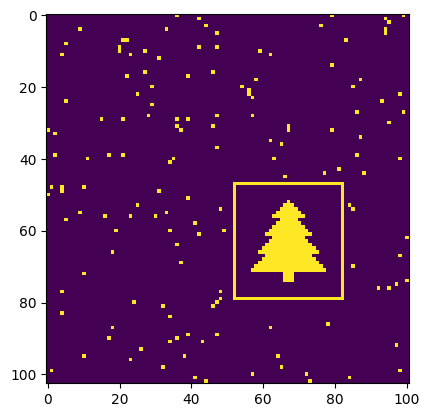

In [30]:
from matplotlib import pyplot as plt
import numpy as np

robots = []

with open(join(cwd, "inputs/input_14.txt")) as file:
    for line in file:
        p = line.split(" ")[0].split("=")[1].split(",")
        v = line.split(" ")[1].split("=")[1].split(",")
        robots.append([(int(p[0]),int(p[1])), (int(v[0]),int(v[1]))])

found_tree = False
second = 0

while(not found_tree):
    grid = np.zeros((rows, cols))
    points = set()
    for robot in robots:
        points.add(robot[0])
    for y in range(rows):
        adjacent_pixels = 0
        for x in range(cols):
            if (x,y) in points:
                adjacent_pixels += 1
                grid[y][x] = 1
            else:
                adjacent_pixels = 0
            if adjacent_pixels == 10:
                found_tree = True
    
    if found_tree:
        print(second)
        plt.imshow(grid)
    else:
        second += 1
        robots = step_robots(robots)


### Day 15

In [31]:
grid = []
moves = []
with open(join(cwd, "inputs/input_15.txt")) as file:
    input = file.read().split("\n\n")
    grid = [list(x) for x in input[0].split("\n")]
    moves = [move_set for x in [list(x) for x in input[1].split("\n")] for move_set in x] 

boxes = []
walls = []
rpos = ()

for y,row in enumerate(grid):
    for x,symbol in enumerate(row):
        if symbol == "@":
            rpos = (x,y)
        if symbol == "O":
            boxes.append((x,y))
        if symbol == "#":
            walls.append((x,y))

dir_map = {
    "^": (0,-1),
    "v": (0,1),
    "<": (-1,0),
    ">": (1,0)
}

def move_robot(robot_position, dir, box_positions, wall_positions):
    rpos_new = robot_position
    boxes_new = box_positions

    rx,ry = robot_position
    dx,dy = dir_map[dir]

    if (rx+dx,ry+dy) not in wall_positions and (rx+dx,ry+dy) not in box_positions:
        rpos_new = (rx+dx,ry+dy)
    elif (rx+dx,ry+dy) in box_positions:
        i = 1
        while((rx+dx*i,ry+dy*i) in box_positions):
            i += 1
        if (rx+dx*i,ry+dy*i) not in wall_positions:
            rpos_new = (rx+dx,ry+dy)
            boxes_new.remove((rx+dx,ry+dy))
            boxes_new.append((rx+dx*i,ry+dy*i))

    return rpos_new, boxes_new

for move in moves:
    rpos, boxes = move_robot(rpos, move, boxes, walls)

gps_sum = 0
for box in boxes:
    x,y = box
    gps_sum += 100*y + x

print(gps_sum)

1538871


In [32]:
grid = []
moves = []
with open(join(cwd, "inputs/input_15.txt")) as file:
    input = file.read().split("\n\n")
    grid = [list(x) for x in input[0].split("\n")]
    moves = [move_set for x in [list(x) for x in input[1].split("\n")] for move_set in x] 

new_grid = []
rpos = ()

for y,row in enumerate(grid):
    new_row = []
    for x,symbol in enumerate(row):
        if symbol == "@":
            new_row += "@."
            rpos = (len(new_row)-2, y)
        if symbol == "O":
            new_row += "[]"
        if symbol == "#":
            new_row += "##"
        if symbol == ".":
            new_row += ".."
    new_grid.append(list(new_row))

def merge(a,b):
    r = a
    for eb in b: 
        if eb not in a: r.append(eb)
    return r

def step(x, y, dir):
    dx, dy = dir_map[dir]
    if new_grid[y+dy][x+dx] == "#": return []
    if new_grid[y+dy][x+dx] == ".": return [(x,y)]
    
    if dir == ">" or dir == "<":
        m = step(x+dx, y+dy, dir)
        if m: return merge(m,[(x,y)]) 

    if dir == "^" or dir == "v":
        xbox = x if new_grid[y+dy][x+dx] == "[" else x - 1
        m1 = step(xbox+dx, y+dy, dir)
        m2 = step(xbox+1+dx, y+dy, dir)
        if m1 and m2: return merge(merge(m1,m2),[(x,y)])
    
    return []

for move in moves:
    x, y = rpos
    dx, dy = dir_map[move]
    pos = step(x, y, move)
    if pos: rpos = (x+dx, y+dy)
    for p in pos:
        px, py = p
        new_grid[py][px], new_grid[py+dy][px+dx] = new_grid[py+dy][px+dx], new_grid[py][px]

gps_sum = 0
for y, row in enumerate(new_grid):
    for x, symbol in enumerate(row):
        if symbol == "[": 
            gps_sum += 100*y + x 
print(gps_sum)

1543338


### Day 16

In [33]:
import heapq

maze = []
with open(join(cwd, "inputs/input_16.txt")) as file:
    for line in file:
        maze.append(list(line.strip()))

start = () 
end =  ()

# Get start and end positions
for y, row in enumerate(maze):
    for x, symbol in enumerate(row):
        if symbol == "S":
            start = (x,y)
        if symbol == "E":
            end = (x,y)

directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def dijkstra(maze, start, end):
    pq = []
    heapq.heappush(pq, (0, start[0], start[1], 1))
    visited = {}

    while pq:
        cost, x, y, current_dir = heapq.heappop(pq)
        # Reached end
        if (x, y) == end:
            return cost
        # Already visited with lower cost
        if (x, y, current_dir) in visited and cost >= visited[(x, y, current_dir)]:
            continue
        # Mark visited
        visited[(x, y, current_dir)] = cost
        # Explore neighbors
        for new_dir, (dx, dy) in enumerate(directions):
            nx, ny = x + dx, y + dy
            if maze[ny][nx] == "." or maze[ny][nx] == "E":
                if current_dir == new_dir:
                    new_cost = cost + 1
                else:
                    new_cost = cost + 1000 + 1
                
                heapq.heappush(pq,(new_cost, nx, ny, new_dir))
    
    raise Exception("Path doesn't exist!")
    
minimum_cost = dijkstra(maze, start, end)
print(minimum_cost)


85432


In [34]:

def dijkstra_paths(maze, start, end):
    pq = []
    heapq.heappush(pq, (0, start[0], start[1], 1, [(start[0],start[1])]))
    visited = {}
    min_cost = float("inf")
    paths = []

    while pq:
        cost, x, y, current_dir, path = heapq.heappop(pq)
        # Reached end
        if (x, y) == end:
            if cost < min_cost:
                min_cost = cost
                paths=[path]
            elif cost == min_cost:
                paths.append(path)
            continue
        # Already visited with lower cost
        if (x, y, current_dir) in visited and cost > visited[(x, y, current_dir)]:
            continue
        # Mark visited
        visited[(x, y, current_dir)] = cost
        # Explore neighbors 
        for new_dir, (dx, dy) in enumerate(directions):
            nx, ny = x + dx, y + dy
            if maze[ny][nx] == "." or maze[ny][nx] == "E":
                if current_dir == new_dir:
                    new_cost = cost + 1
                else:
                    new_cost = cost + 1000 + 1
                    
                heapq.heappush(pq, (new_cost, nx, ny, new_dir, path + [(nx,ny)]))

    return paths
    
paths = dijkstra_paths(maze, start, end)
result = set()
for path in paths:
    for point in path:
        result.add(point)   

print(len(result))

465


### Day 17

In [382]:
registers = {}
program = []

with open(join(cwd, "inputs/input_17.txt")) as file:
    r, p = file.read().split("\n\n")
    
    r = r.split("\n")
    for x in r:
        registers[x.split(" ")[1][0]] = int(x.split(" ")[2])

    p = p.strip().split(" ")[1].split(",")
    program = [int(x) for x in p]

def run():
    program.append("Halt")
    output = []
    combo_ops = [0, 2, 5, 6, 7]
    instruction_pointer = 0

    while(True):
        
        if program[instruction_pointer] == "Halt":
            break

        opcode = program[instruction_pointer] 
        operand = program[instruction_pointer + 1]

        if(opcode in combo_ops):
            if operand == 4: operand = registers["A"]
            elif operand == 5: operand = registers["B"]
            elif operand == 6: operand = registers["C"]
            elif operand == 7: raise Exception("Operand is Reserved!")

        if opcode == 0: registers["A"] = registers["A"] // 2 ** operand
        elif opcode == 1: registers["B"] = registers["B"] ^ operand   
        elif opcode == 2: registers["B"] = operand % 8
        elif opcode == 3: 
            if registers["A"] != 0:
                instruction_pointer = operand
                continue
        elif opcode == 4: registers["B"] = registers["B"] ^ registers["C"]
        elif opcode == 5: output.append(operand % 8)
        elif opcode == 6: registers["B"] = registers["A"] // 2 ** operand
        elif opcode == 7: registers["C"] = registers["A"] // 2 ** operand
        else: raise Exception("Operator is 8 or more!") 

        instruction_pointer += 2
    
    program.pop()
    return output

print(",".join(str(x) for x in run()))

7,1,3,7,5,1,0,3,4


In [401]:

def findA():
    queue = [(len(program) - 1, 0, True, [])]
    while queue:
        offset, val, calc, added = queue.pop(0)
        if calc:
            for cur in range(8):
                next_val = (val << 3) + cur
                
                registers["A"] = next_val
                registers["B"] = 0
                registers["C"] = 0
                result = run()
                
                if result == program[offset:]:
                    if offset == 0:
                        return next_val
                    queue.append((offset - 1, next_val, True, added + [cur]))
                else:
                    queue.append((offset - 1, next_val, False, added + [cur]))

print(findA())
        

190384113204239


### Day 18

In [32]:
from collections import deque

corrupted_bytes = []
with open(join(cwd, "inputs/input_18.txt")) as file:
    counter = 0
    for line in file:
        corrupted_bytes.append((int(line.strip().split(",")[0]), int(line.strip().split(",")[1])))
 
def shortest_path(walls):
    rows, cols = 71, 71
    start = (0, 0)
    end = (cols - 1, rows - 1)

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    wall_set = set(walls)

    queue = deque([(start, 0)])
    visited = set()
    visited.add(start)

    while queue:
        current, steps = queue.popleft()
        if current == end:
            return steps
        for direction in directions:
            next_col = current[0] + direction[0]
            next_row = current[1] + direction[1]
            next_pos = (next_col, next_row)
            if (0 <= next_row < rows and 0 <= next_col < cols and next_pos not in wall_set and next_pos not in visited):
                queue.append((next_pos, steps + 1))
                visited.add(next_pos)
    
    return -1

print(shortest_path(corrupted_bytes[:1024]))


246


In [37]:
for falling_byte in range(1024, len(corrupted_bytes)):
    if shortest_path(corrupted_bytes[:falling_byte + 1]) == -1:
        result = corrupted_bytes[falling_byte]
        print(str(result[0]) + "," + str(result[1]))
        break

22,50


### Day 19

In [35]:
patterns = []
designs = []

with open(join(cwd, "inputs/input_19.txt")) as file:
    p,d = file.read().split("\n\n")
    patterns = p.strip().split(", ")
    for line in d.split("\n"):
        designs.append(line)

def can_create_design(design):
    if not design:
        return True
    for pattern in patterns:
        if design.startswith(pattern):
            if can_create_design(design[len(pattern):]):
                return True
    return False

possible_count = 0
for design in designs:
    if can_create_design(design):
        possible_count += 1
print(possible_count)


238


In [39]:
from functools import lru_cache

@lru_cache(None)
def count_design_ways(design):
    if not design:
        return 1
    count = 0
    for pattern in patterns:
        if design.startswith(pattern):
            count += count_design_ways(design[len(pattern):])    
    return count

result = 0
for design in designs:
    result += count_design_ways(design)
print(result)

635018909726691


### Day 20

In [33]:
from collections import deque

maze = []

start = (0, 0)
end = (0, 0)

with open(join(cwd, "inputs/input_20.txt")) as file:
    for y, line in enumerate(file):
        line = list(line.strip())
        maze.append(line)
        if "S" in line:
            start = (line.index("S"), y)
        if "E" in line:
            end = (line.index("E"), y)

directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
rows, cols = len(maze), len(maze[0])

def bfs(start_pos):
        dist = [[float('inf')] * cols for _ in range(rows)]
        sx, sy = start_pos
        dist[sy][sx] = 0
        queue = deque([start_pos])
        while queue:
            x, y = queue.popleft()
            for dx, dy in directions:
                nx, ny = x+dx, y+dy
                if 0 <= ny < rows and 0 <= nx < cols:
                    if maze[ny][nx] in (".", "S", "E") and dist[ny][nx] > dist[y][x] + 1:
                        dist[ny][nx] = dist[y][x] + 1
                        queue.append((nx, ny))
        return dist

dist_from_S = bfs(start)
dist_from_E = bfs(end)
normal_dist = dist_from_S[end[0]][end[1]]

cheats = set()

for y in range(rows):
    for x in range(cols):
        if dist_from_S[y][x] == float('inf'): continue
        if maze[y][x] == "#": continue
        base_dist = dist_from_S[y][x]
        
        # 1-step cheat
        for dx, dy in directions:
            nx, ny = x+dx, y+dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[ny][nx] in (".", "S", "E") and dist_from_E[ny][nx] != float('inf'):
                route_with_cheat = base_dist + 1 + dist_from_E[ny][nx]
                saving = normal_dist - route_with_cheat
                if saving >= 100: cheats.add((x,y,nx,ny))
        # 2-step cheat
        for dx1, dy1 in directions:
            ix, iy = x+dx1, y+dy1
            if 0 <= ix < rows and 0 <= iy < cols:
                for dx2, dy2 in directions:
                    jx, jy = ix+dx2, iy+dy2
                    if 0 <= jy < rows and 0 <= jx < cols and maze[jy][jx] in (".", "S", "E") and dist_from_E[jy][jx] != float('inf'):
                        route_with_cheat = base_dist + 2 + dist_from_E[jy][jx]
                        saving = normal_dist - route_with_cheat
                        if saving >= 100: cheats.add((x,y,jx,jy))

print(len(cheats))

1415


In [31]:
cheats = set()
track_cells_from_S = [(x,y) for y in range(rows) for x in range(cols) if dist_from_S[y][x] != float('inf') and maze[y][x] != "#"]

for (sx, sy) in track_cells_from_S:
        dist_ignore_walls = [[float('inf')] * cols for _ in range(rows)]
        dist_ignore_walls[sy][sx] = 0
        q = deque([(sx, sy)])
        while q:
            x, y = q.popleft()
            d = dist_ignore_walls[y][x]
            if d == 20: continue
            for dx, dy in directions:
                nx, ny = x+dx, y+dy
                if 0 <= ny < rows and 0 <= nx < cols and dist_ignore_walls[ny][nx] > d + 1:
                    dist_ignore_walls[ny][nx] = d+1
                    q.append((nx, ny))

        # All maze cells reachable within ≤20 steps
        base_dist = dist_from_S[sy][sx]
        for fy in range(rows):
            for fx in range(cols):
                d = dist_ignore_walls[fy][fx]
                if d != float('inf') and 1 <= d <= 20 and maze[fy][fx] != "#" and dist_from_E[fy][fx] != float('inf'):
                    route_with_cheat = base_dist + d + dist_from_E[fy][fx]
                    saving = normal_dist - route_with_cheat
                    if saving >= 100: cheats.add((sx, sy, fx, fy))

print(len(cheats))


1022577


### Day 21

In [139]:
from functools import lru_cache

codes = []
with open(join(cwd, "inputs/input_21.txt")) as file:
    for line in file:
        codes.append(line.strip())

def pad(layer):
    if layer == 0: 
        return {'7':(0,0), '8':(0,1), '9':(0,2), 
                '4':(1,0), '5':(1,1), '6':(1,2), 
                '1':(2,0), '2':(2,1), '3':(2,2),
                '-':(3,0), '0':(3,1), 'A':(3,2)}
    else: 
        return {'-':(0,0), '^':(0,1), 'A':(0,2),
                '<':(1,0), 'v':(1,1), '>':(1,2)}

@lru_cache(None)
def get_shortest_length(layer, code, max_iter, prev='A'):
    if layer == max_iter: return len(code)
    length = 0
    for char in code:
        min_length = float('inf')

        x1, y1 = pad(layer)[prev]
        x2, y2 = pad(layer)[char]
        xn, yn = pad(layer)['-']
        
        s1 = '^' * max(x1-x2, 0) + 'v' * max(x2-x1, 0)
        s2 = '<' * max(y1-y2, 0) + '>' * max(y2-y1, 0)

        if x1 != xn or y2 != yn:
            min_length = min(min_length, get_shortest_length(layer+1, s2+s1+'A', max_iter))

        if x2 != xn or y1 != yn: 
            min_length = min(min_length, get_shortest_length(layer+1, s1+s2+'A', max_iter))
        
        length += min_length
        prev = char

    return length

complexities = 0
for code in codes:
    complexities += get_shortest_length(0, code, 3) * int(code[:3]) 
print(complexities)

248684


In [137]:
complexities = 0
for code in codes:
    complexities += get_shortest_length(0, code, 26) * int(code[:3]) 
print(complexities)

307055584161760


### Day 22

In [22]:
numbers = []
with open(join(cwd, "inputs/input_22.txt")) as file:
    for line in file:
        numbers.append(int(line.strip()))

def step_number(number):
    n1 = number * 64
    n1 ^= number
    n1 %= 16777216
        
    n2 = n1 // 32
    n2 ^= n1
    n2 %= 16777216
        
    n3 = n2 * 2048
    n3 ^= n2
    n3 %= 16777216
    
    return n3

result = []
for number in numbers:
    for s in range(2000):
        number = step_number(number)
    result.append(number)

print(sum(result))

16894083306


In [ ]:
numbers = []
with open(join(cwd, "inputs/input_22.txt")) as file:
    for line in file:
        numbers.append(int(line.strip()))

sequences = {}
for number in numbers:
    bananas = []
    for s in range(2000):
        number = step_number(number)
        bananas.append(number%10)

    tried_sequences = set()
    changes = [x2-x1 for (x1,x2) in zip(bananas, bananas[1:])]
    for i in range(len(changes) - 3):
        sequence = str(changes[i]) + "," + str(changes[i+1]) + "," + str(changes[i+2]) + "," + str(changes[i+3])
        if sequence in tried_sequences:
            continue
        
        tried_sequences.add(sequence)
        if not sequence in sequences.keys():
            sequences[sequence] = 0
        sequences[sequence] += bananas[i+4]

print(max(sequences.values()))

1925


### Day 23

In [51]:
from collections import defaultdict

connections = []
with open(join(cwd, "inputs/input_23.txt")) as file:
    for line in file:
        connections.append(line.strip().split('-'))

graph = defaultdict(set)
for conn in connections:
    node1, node2 = conn[0], conn[1]
    graph[node1].add(node2)
    graph[node2].add(node1)

triples = set()
for node in graph:
    for neighbour1 in graph[node]:
        for neighbour2 in graph[neighbour1]:
            if neighbour2 != node and node in graph[neighbour2]:
                triple = tuple(sorted([node, neighbour1, neighbour2]))
                if any(n.startswith('t') for n in triple):
                    triples.add(triple)
     
print(len(triples))


1156


In [59]:
def bron_kerbosch(graph, R, P, X, cliques):
    if not P and not X:
        cliques.append(R)  
        return
    pivot = next(iter(P | X))  
    for v in P - graph[pivot]:
        bron_kerbosch(
            graph,
            R | {v},            
            P & graph[v],       
            X & graph[v],       
            cliques
        )
        P.remove(v)             
        X.add(v)       

def bron_kerbosch_find_cliques(graph):
    cliques = []
    nodes = set(graph.keys())
    bron_kerbosch(graph, set(), nodes, set(), cliques)
    return cliques

all_cliques = bron_kerbosch_find_cliques(graph)
largest_clique = max(all_cliques, key=len)

print(','.join(sorted(largest_clique)))

bx,cx,dr,dx,is,jg,km,kt,li,lt,nh,uf,um


### Day 24

In [31]:
start_values = {}
operations = []
outputs = {}

with open(join(cwd, "inputs/input_24.txt")) as file:
    vals, ops  = file.read().split("\n\n")
    vals, ops = vals.split("\n"), ops.split("\n")
    for val in vals:
        start_values[val.split(": ")[0]] = int(val.split(": ")[1])
    for op in ops:
        op = op.split(" ")
        outputs[op[4]] = None
        operations.append((op[1], op[0], op[2], op[4]))

def calculate(op):
    gate, val1, val2, res = op

    if val1 in start_values.keys():
        val1 = start_values[val1]
    elif outputs[val1] != None:
        val1 = outputs[val1]
    else: return False

    if val2 in start_values.keys():
        val2 = start_values[val2]
    elif outputs[val2] != None:
        val2 = outputs[val2]
    else: return False

    if gate == "AND": outputs[res] = val1 & val2
    if gate == "OR": outputs[res] = val1 | val2
    if gate == "XOR": outputs[res] = val1 ^ val2
    return True

while(None in outputs.values()):
    for op in operations:
        if calculate(op):
            continue

sort_list = sorted(outputs)
sort_list.reverse()
output = ""
for key in sort_list:
    if key.startswith('z'):
        output+=str(outputs[key])
print(int(output, 2))


51837135476040


In [38]:
formulas = {}

with open(join(cwd, "inputs/input_24.txt")) as file:
    for i, line in enumerate(file):
        if "->" in line:
            x, op, y, z = line.replace(" -> ", " ").split()
            formulas[z] = (op, x, y)

def make_wire(char, num):
    return char + str(num).rjust(2, "0")

def verify_z(wire, num):
    if wire not in formulas: return False
    op, x, y = formulas[wire]
    if op != "XOR": return False
    if num == 0: return sorted([x, y]) == ["x00", "y00"]
    return verify_intermediate_xor(x, num) and verify_carry_bit(y, num) or verify_intermediate_xor(y, num) and verify_carry_bit(x, num)

def verify_intermediate_xor(wire, num):
    if wire not in formulas: return False
    op, x, y = formulas[wire]
    if op != "XOR": return False
    return sorted([x, y]) == [make_wire("x", num), make_wire("y", num)]

def verify_carry_bit(wire, num):
    if wire not in formulas: return False
    op, x, y = formulas[wire]
    if num == 1:
        if op != "AND": return False
        return sorted([x, y]) == ["x00", "y00"]
    if op != "OR": return False
    return verify_direct_carry(x, num - 1) and verify_recarry(y, num - 1) or verify_direct_carry(y, num - 1) and verify_recarry(x, num - 1)

def verify_direct_carry(wire, num):
    if wire not in formulas: return False
    op, x, y = formulas[wire]
    if op != "AND": return False
    return sorted([x, y]) == [make_wire("x", num), make_wire("y", num)]

def verify_recarry(wire, num):
    if wire not in formulas: return False
    op, x, y = formulas[wire]
    if op != "AND": return False
    return verify_intermediate_xor(x, num) and verify_carry_bit(y, num) or verify_intermediate_xor(y, num) and verify_carry_bit(x, num)

def verify(num):
    return verify_z(make_wire("z", num), num)

def progress():
    i = 0
    
    while True:
        if not verify(i): break
        i += 1
    
    return i

swaps = []

for _ in range(4):
    baseline = progress()
    for x in formulas:
        for y in formulas:
            if x == y: continue
            formulas[x], formulas[y] = formulas[y], formulas[x]
            if progress() > baseline:
                break
            formulas[x], formulas[y] = formulas[y], formulas[x]
        else:
            continue
        break
    swaps += [x, y]

print(",".join(sorted(swaps)))

hjf,kdh,kpp,sgj,vss,z14,z31,z35


### Day 25

In [22]:
locks = []
keys = []

with open(join(cwd, "inputs/input_25.txt")) as file:
    grids = file.read().split("\n\n")
    for grid in grids:
        if grid.startswith('#'): write = locks
        else: write = keys
        grid = grid.split("\n")
        grid = [''.join(col).count('#') for col in zip(*grid)]
        write.append(grid)

key_lock_pairs = 0
for lock in locks:
    for key in keys:
        if all(lock[i] + key[i] <= 7 for i in range(5)):
            key_lock_pairs += 1
print(key_lock_pairs)
         

3249
